In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [2]:
base = pd.read_csv("mt_cars.csv")
base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
base.shape

(32, 12)

In [4]:
base = base.drop(["Unnamed: 0"], axis = 1)
base.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
x = base.iloc[:,2].values
x

array([160. , 160. , 108. , 258. , 360. , 225. , 360. , 146.7, 140.8,
       167.6, 167.6, 275.8, 275.8, 275.8, 472. , 460. , 440. ,  78.7,
        75.7,  71.1, 120.1, 318. , 304. , 350. , 400. ,  79. , 120.3,
        95.1, 351. , 145. , 301. , 121. ])

In [6]:
y = base.iloc[:,0].values
y

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4])

In [7]:
correlacao = np.corrcoef(x,y)
correlacao

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

In [8]:
x = x.reshape(-1,1)
x

array([[160. ],
       [160. ],
       [108. ],
       [258. ],
       [360. ],
       [225. ],
       [360. ],
       [146.7],
       [140.8],
       [167.6],
       [167.6],
       [275.8],
       [275.8],
       [275.8],
       [472. ],
       [460. ],
       [440. ],
       [ 78.7],
       [ 75.7],
       [ 71.1],
       [120.1],
       [318. ],
       [304. ],
       [350. ],
       [400. ],
       [ 79. ],
       [120.3],
       [ 95.1],
       [351. ],
       [145. ],
       [301. ],
       [121. ]])

In [9]:
modelo = LinearRegression()

In [10]:
modelo.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
modelo.intercept_

29.59985475616395

In [12]:
modelo.coef_

array([-0.04121512])

In [13]:
modelo.score(x,y) #R²

0.7183433404897299

In [14]:
previsoes = modelo.predict(x)
previsoes

array([23.00543556, 23.00543556, 25.1486218 , 18.96635381, 14.76241157,
       20.32645276, 14.76241157, 23.55359666, 23.79676587, 22.69220065,
       22.69220065, 18.23272467, 18.23272467, 18.23272467, 10.14631813,
       10.64089957, 11.46520197, 26.35622482, 26.47987017, 26.66945973,
       24.64991885, 16.49344661, 17.07045829, 15.17456277, 13.11380677,
       26.34386028, 24.64167582, 25.68029685, 15.13334765, 23.62366236,
       17.19410365, 24.61282524])

In [15]:
modelo_ajustado = sm.ols(formula = "mpg ~ disp", data = base)

In [16]:
modelo_treinado = modelo_ajustado.fit()

In [17]:
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           9.38e-10
Time:                        16:18:04   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

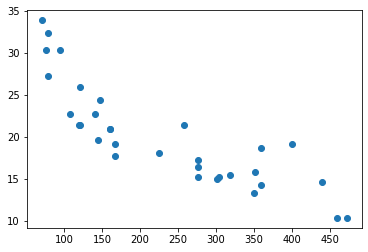

In [18]:
plt.scatter(x,y)

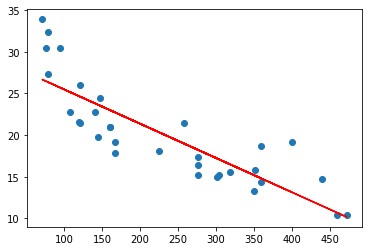

In [19]:
plt.scatter(x,y)
plt.plot(x, previsoes, color = "red")